In [1]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras,Graph

In [2]:
#Split Dataset into Training and Validation Dataset
# images/Set1/ is the path to the folder where the images reside i.e. the dataset we used
train_dataset = keras.preprocessing.image_dataset_from_directory('images/Set1/', validation_split=0.2,
  subset="training",
  seed=123, batch_size=32, image_size=(224, 224))

Found 24672 files belonging to 20 classes.
Using 19738 files for training.


In [3]:
validation_dataset = keras.preprocessing.image_dataset_from_directory('images/Set1/', validation_split=0.2,
  subset="validation",
  seed=123, batch_size=32, image_size=(224, 224))

Found 24672 files belonging to 20 classes.
Using 4934 files for validation.


In [16]:
pretrained_model = tf.keras.models.load_model('seqmodel/wildlife_monitoring.h5')

In [4]:
#This saves the state of the Model we Trained
import os.path

if os.path.isfile('models/wildlife_monitoring.h5') is True:
    pretrained_model.save('models/wildlife_monitoring.h5')#Saves the architecture as well as weights and biases
if os.path.isfile('models/wildlife_monitoring_weights.h5') is True:
    pretrained.save_weights('models/wildlife_monitoring_weights.h5')#Only saves the weight and biases

In [9]:
#Script to see out Dataset
import matplotlib.pyplot as plt
class_names = train_dataset.class_names
def display(display_list):
    plt.figure(figsize = (20,20))
    for images,labels in display_list.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

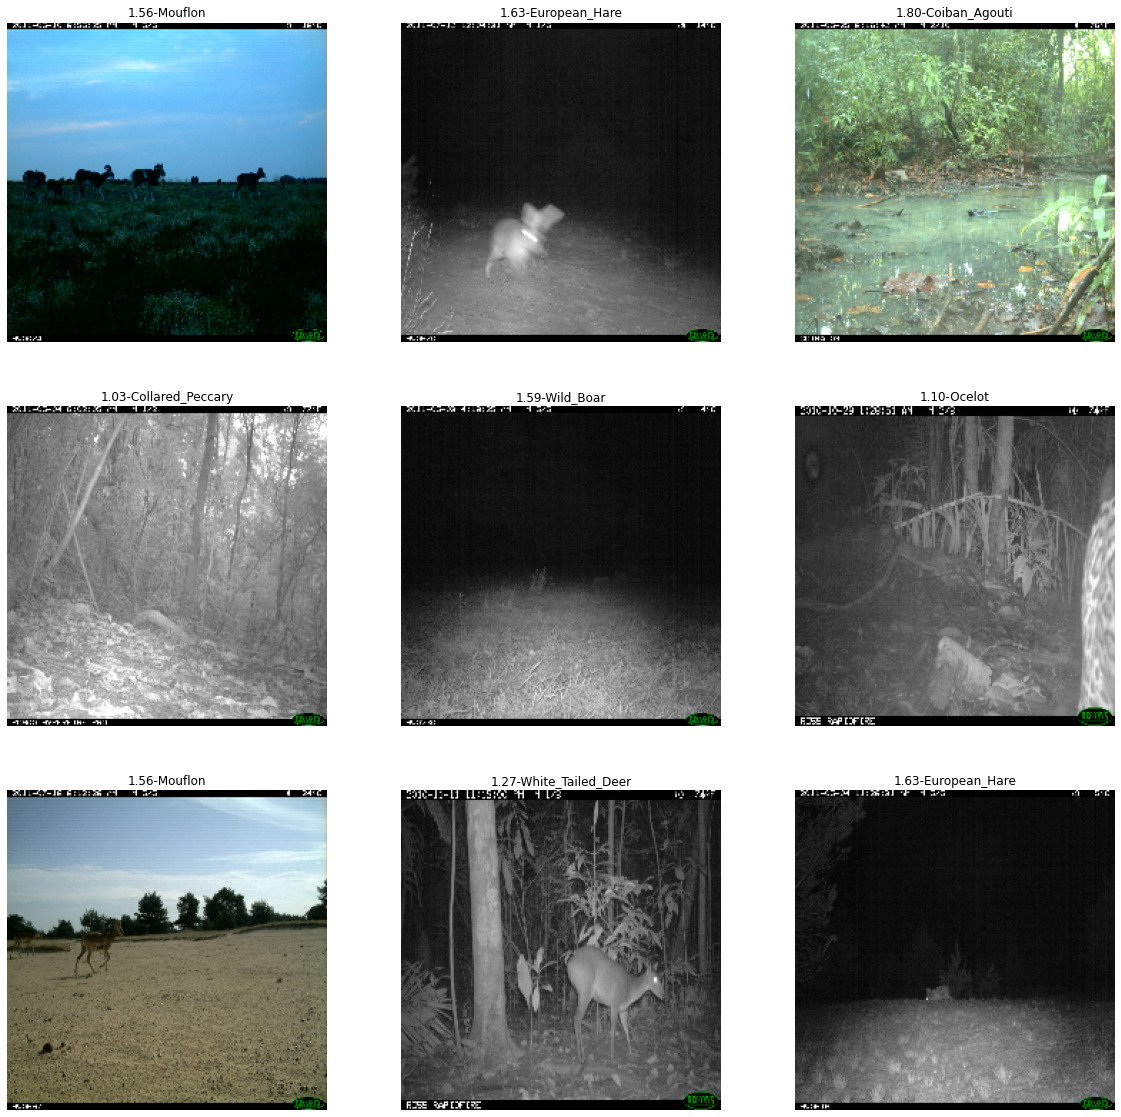

In [10]:
display(train_dataset)

In [21]:
aimg = "images/Set1/1.59-Wild_Boar/SEQ76374/SEQ76374_IMG_0025.JPG"
img = keras.preprocessing.image.load_img(
    coati, target_size=(200,200,3)
)
class_names = train_dataset.class_names

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = pretrained_model.predict(img_array)
score = predictions

1/1 [==============================] - 0s 85ms/step


In [32]:
import matplotlib.pyplot as plt

In [21]:
!pip install utils

In [9]:
from IPython.display import Image,display
from tensorflow.keras.preprocessing.image import load_img
from PIL import ImageOps

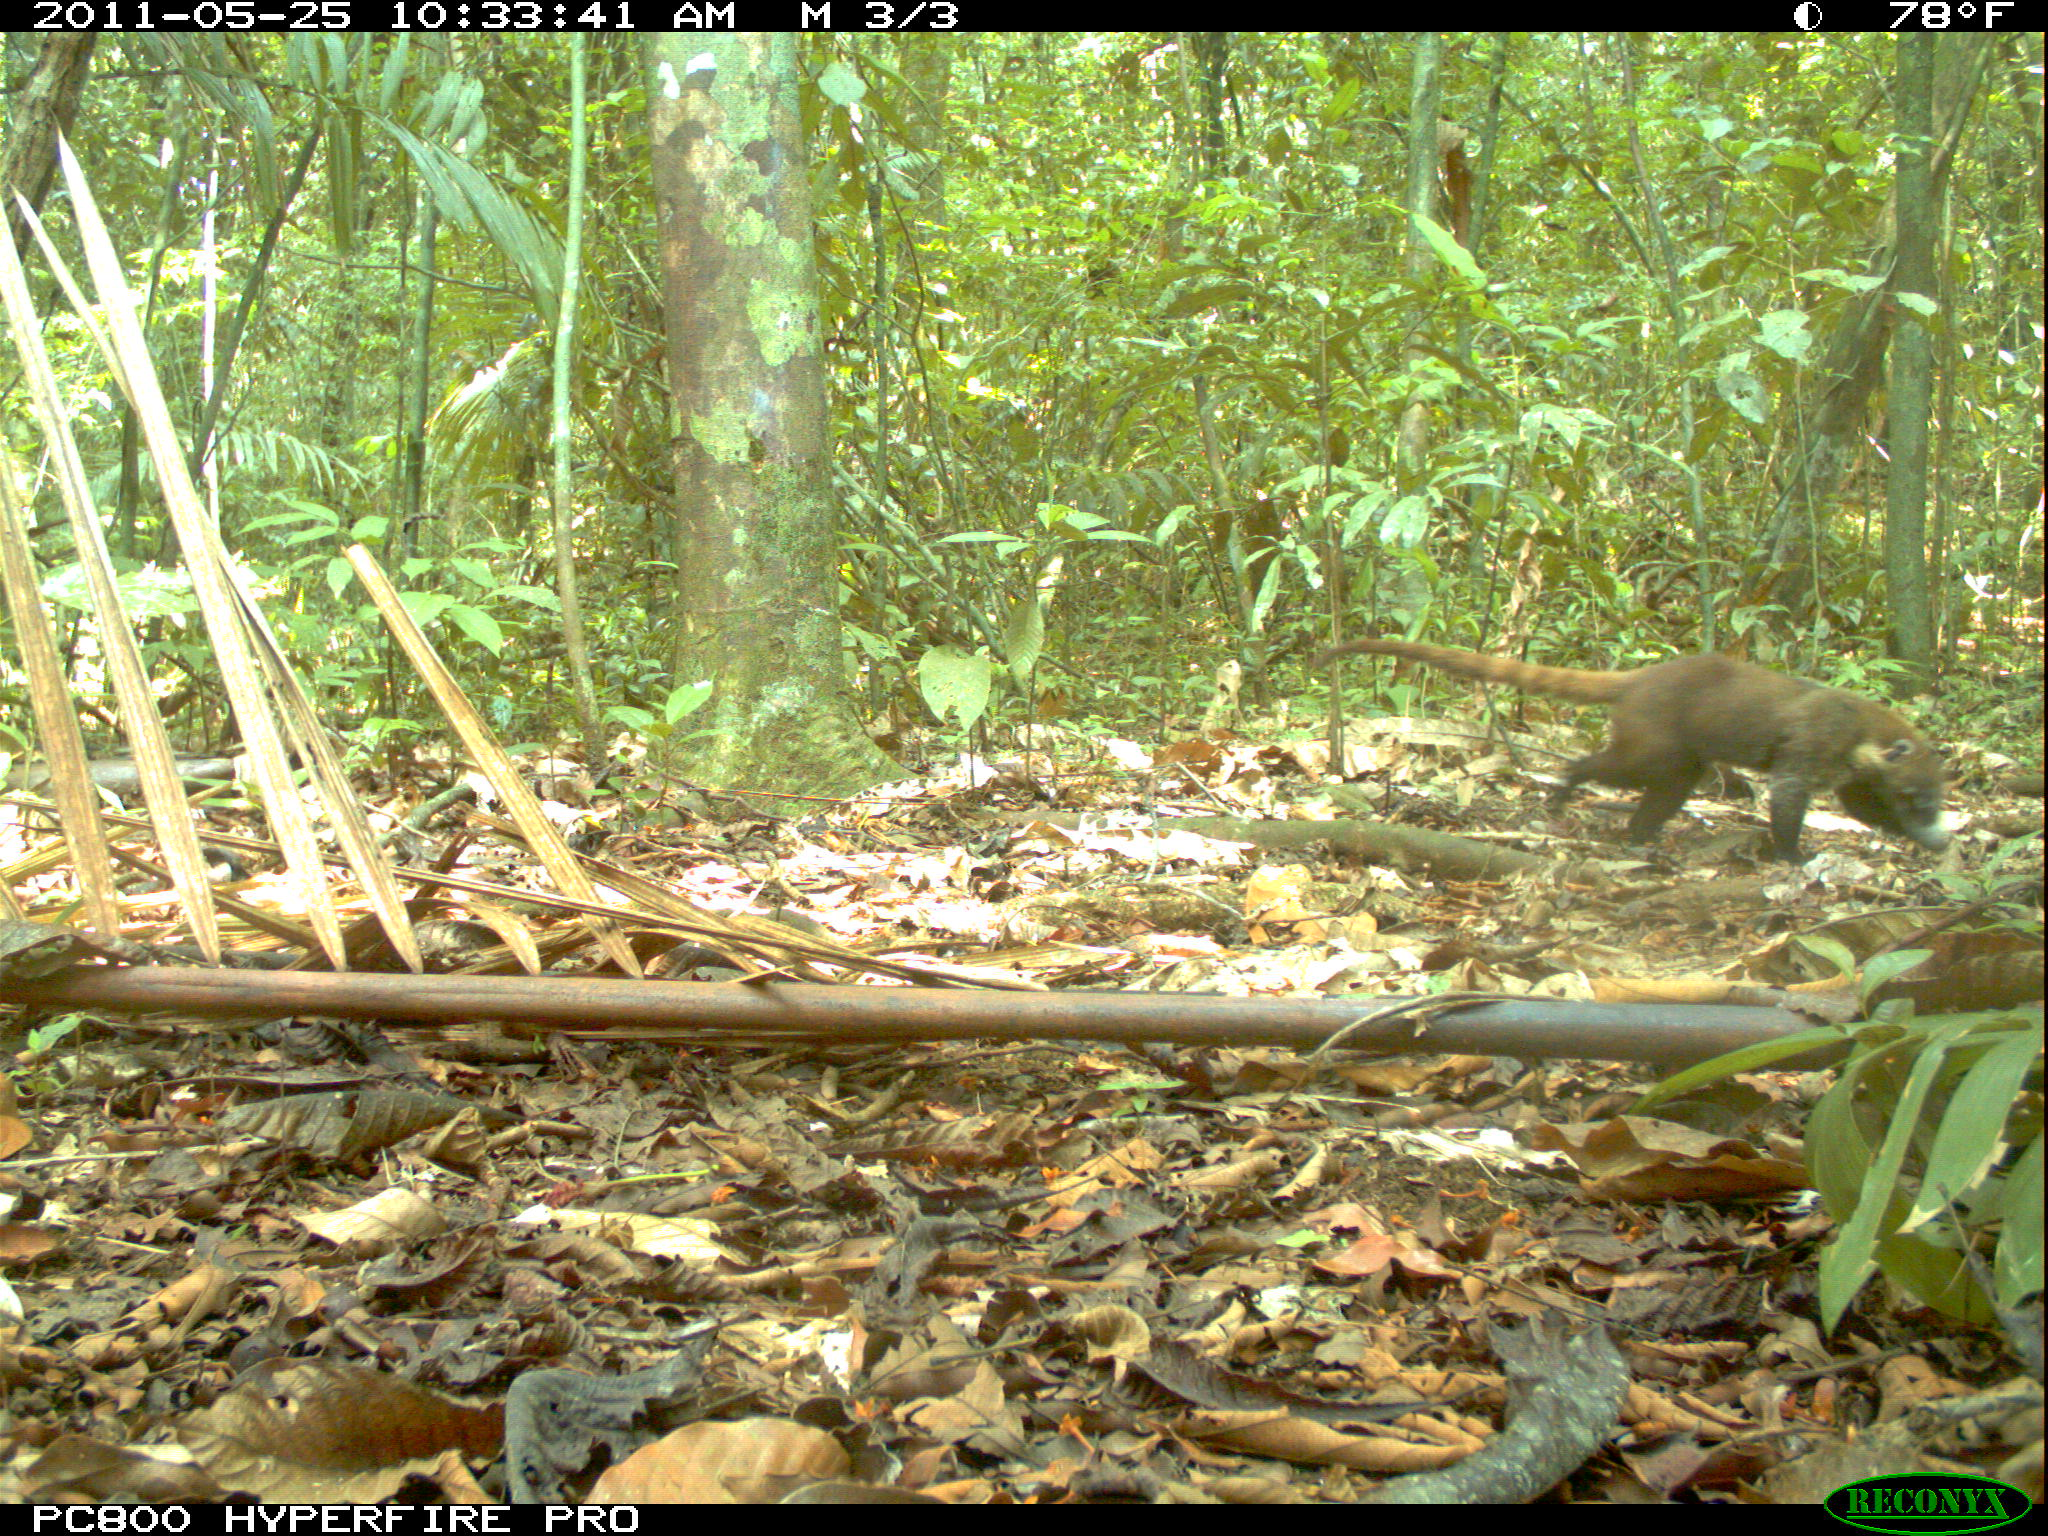

In [10]:
display(Image(filename="images/Set1/1.08-White-nosed_Coati/SEQ86597/SEQ86597_IMG_0003.JPG"))

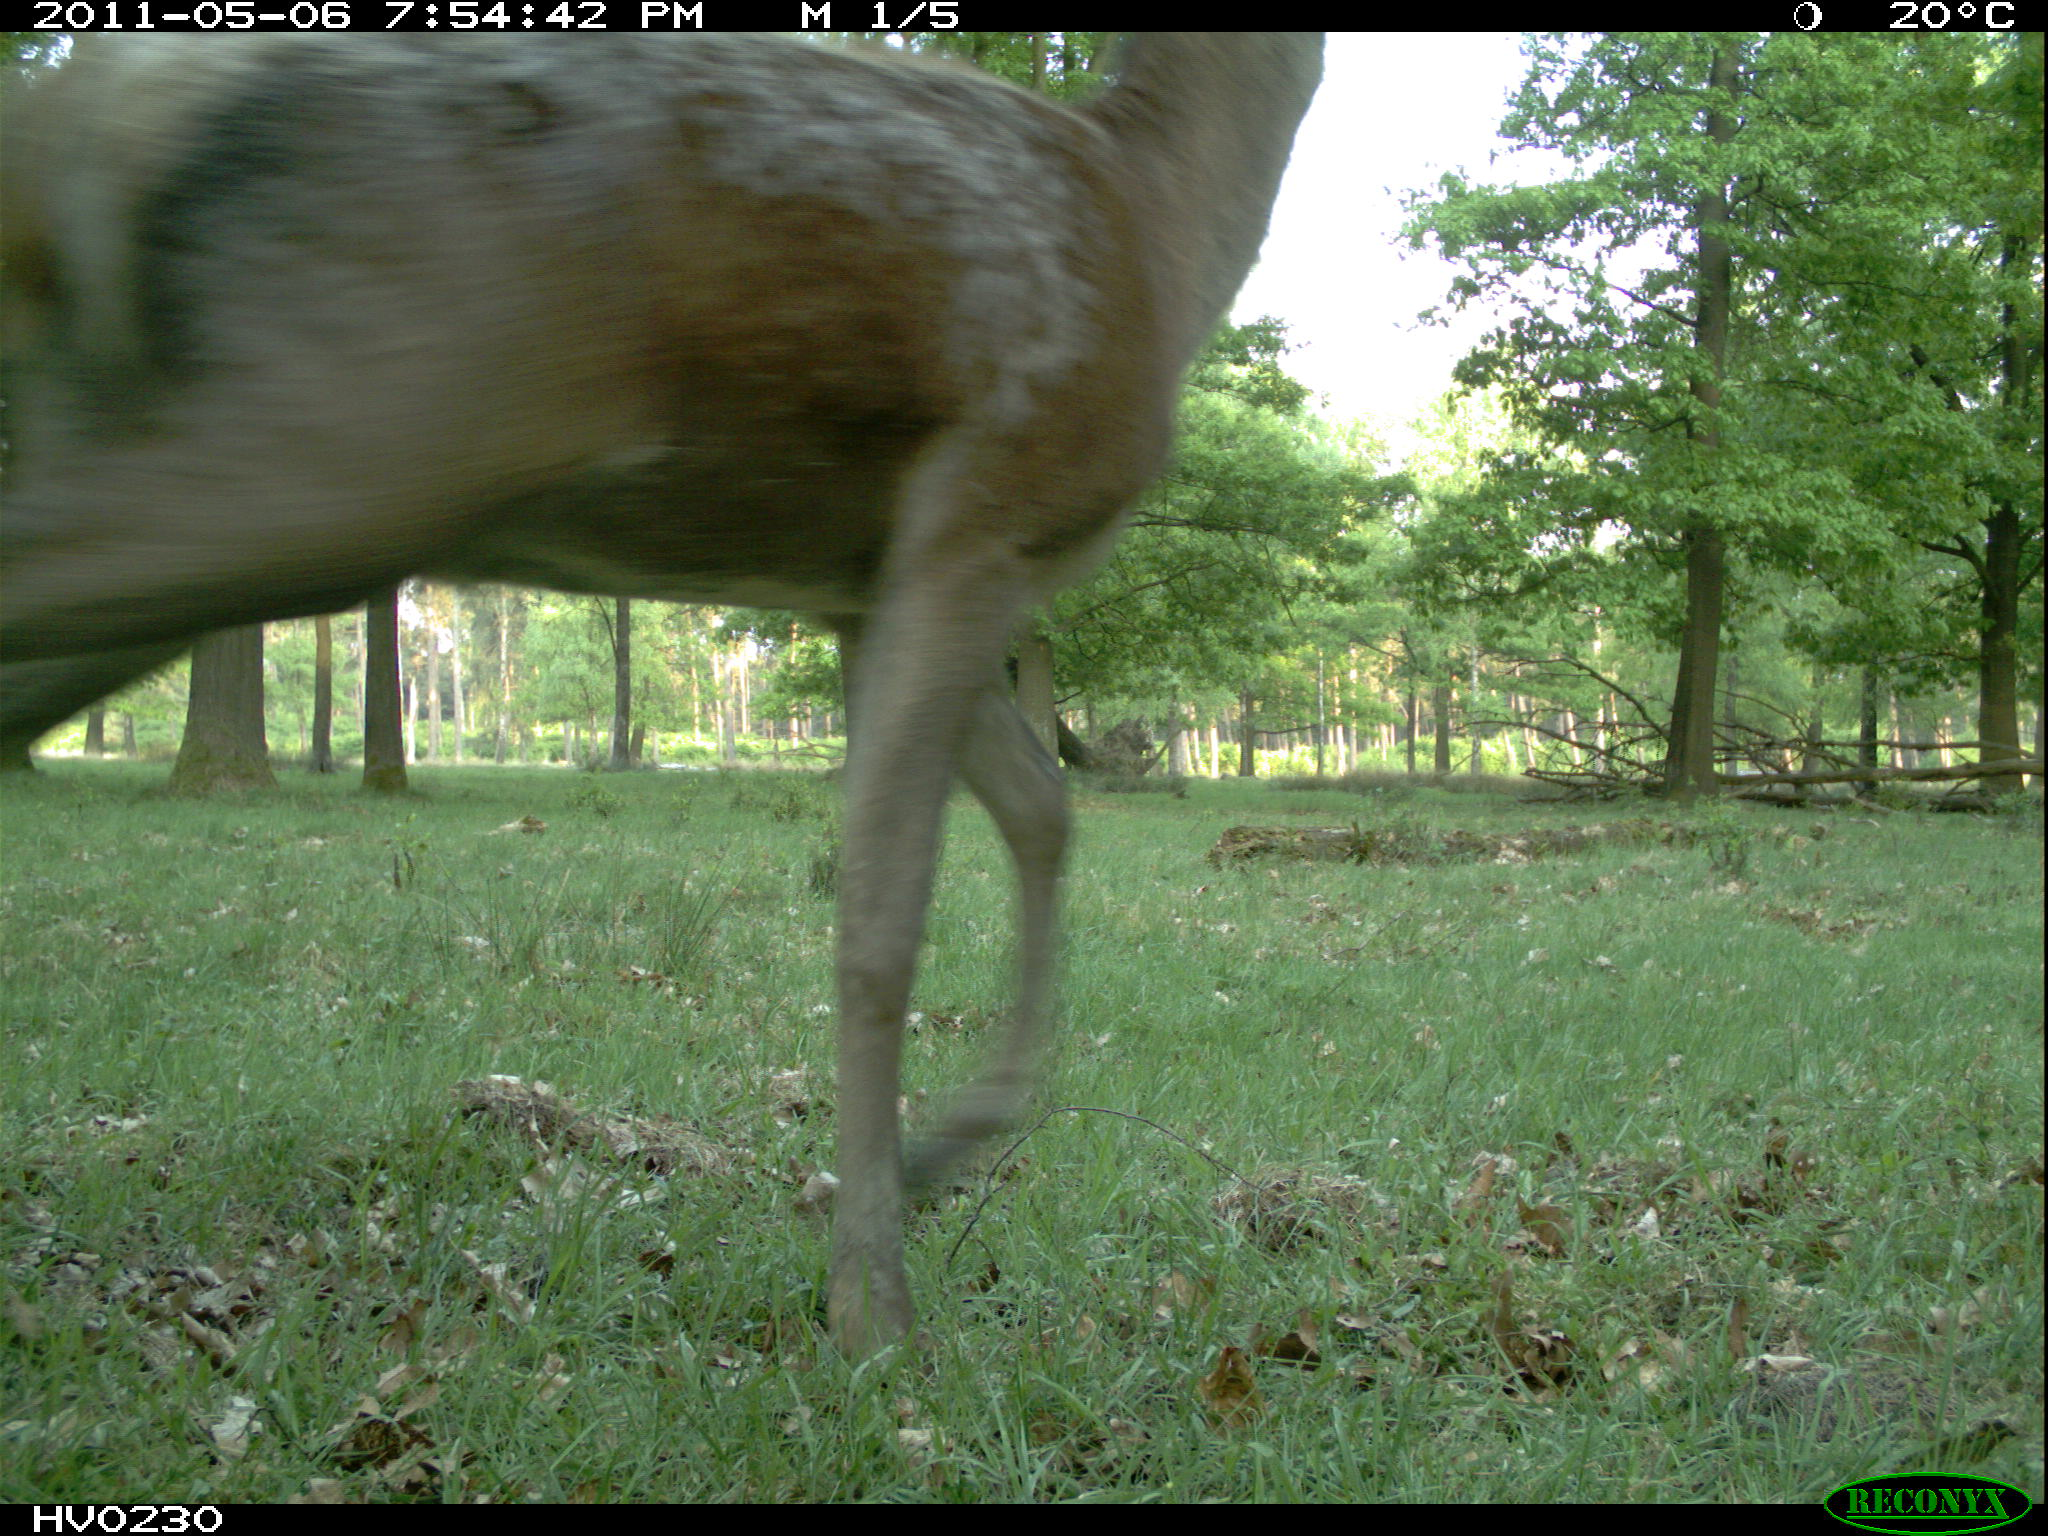

In [19]:
img = ImageOps.autocontrast(load_img("images/Set1/1.57-Red_Deer/SEQ76434/SEQ76434_IMG_0001.JPG"),cutoff=1,ignore=100)
display(img)

In [32]:
os.listdir('images/Set1/')

['1.02-Agouti',
 '1.03-Collared_Peccary',
 '1.06-Paca',
 '1.07-Red_Brocket_Deer',
 '1.08-White-nosed_Coati',
 '1.09-Spiny_Rat',
 '1.10-Ocelot',
 '1.14-Red_Squirrel',
 '1.19-Common_Opossum',
 '1.22-Bird_spec',
 '1.25-Great_Tinamou',
 '1.27-White_Tailed_Deer',
 '1.56-Mouflon',
 '1.57-Red_Deer',
 '1.58-Roe_Deer',
 '1.59-Wild_Boar',
 '1.60-Red_Fox',
 '1.63-European_Hare',
 '1.77-Wood_Mouse',
 '1.80-Coiban_Agouti',
 'labels.txt',
 'README.txt']

In [22]:
import os
import shutil

destloc = 'images/Set2'
sourceloc = 'images/Set1'
substrings=['1.02-Agouti',
 '1.03-Collared_Peccary',
 '1.06-Paca',
 '1.07-Red_Deer',
 '1.08-White-nosed_Coati',
 '1.09-Spiny_Rat',
 '1.10-Ocelot',
 '1.14-Red_Squirrel',
 '1.19-Common_Opossum',
 '1.22-Bird_spec',
 '1.25-Great_Tinamou',
 '1.27-White_Tailed_Deer',
 '1.56-Mouflon',
 '1.57-Red_Deer',
 '1.58-Roe_Deer',
 '1.59-Wild_Boar',
 '1.60-Red_Fox',
 '1.63-European_Hare',
 '1.77-Wood_Mouse',
 '1.80-Coiban_Agouti',
]

def readAnnotations(filepath):
    file = open(filepath,'r')
    lines = file.readlines()
    path=[]
    #loop through all the lines in the file
    for line in lines:
        if line.split('/')[0] in substrings: #checks to see if the index 0 of returned list matches the given substring 
            path.append(line.split(' ',1)[0])
    return path

#Filtered the set of images for which bounding boxes are available 
def imageFilter(location):
    path = readAnnotations('images/Set1/labels.txt')
    print(len(path))
    for img in path:
        if os.path.isdir(f"D:/COMP303/{location}/{img.split('/')[0]}/{img.split('/')[1]}") is False:
            os.makedirs(f"D:/COMP303/{location}/{img.split('/')[0]}/{img.split('/')[1]}")
        if os.path.isfile(f"D:/COMP303/{destloc}/{img}") is False:
            shutil.move(f"D:/COMP303/{sourceloc}/{img}",f"D:/COMP303/{destloc}/{img}")

            
#Manually Apply Bounding Boxes with the help of labels.txt provided along with the Missouri Datasets        
def applyBoxes():
    path = readAnnotations('images/Set1/labels.txt')
    for img in path:
        draw = ImageDraw.Draw(f"D:/COMP303/{newloc}/{img}")
        im_width, im_height = image.size
        (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
        draw.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],width=thickness,fill=color)
        pil_image_rgb = Image.fromarray(image_with_boxes)
        img.save('D:/COMP303/{newloc}/{img}',format="JPEG")
       

In [23]:
imageFilter(destloc)

1276


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [12]:
def prepare_image(file):
    img_path = 'images/Set1'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

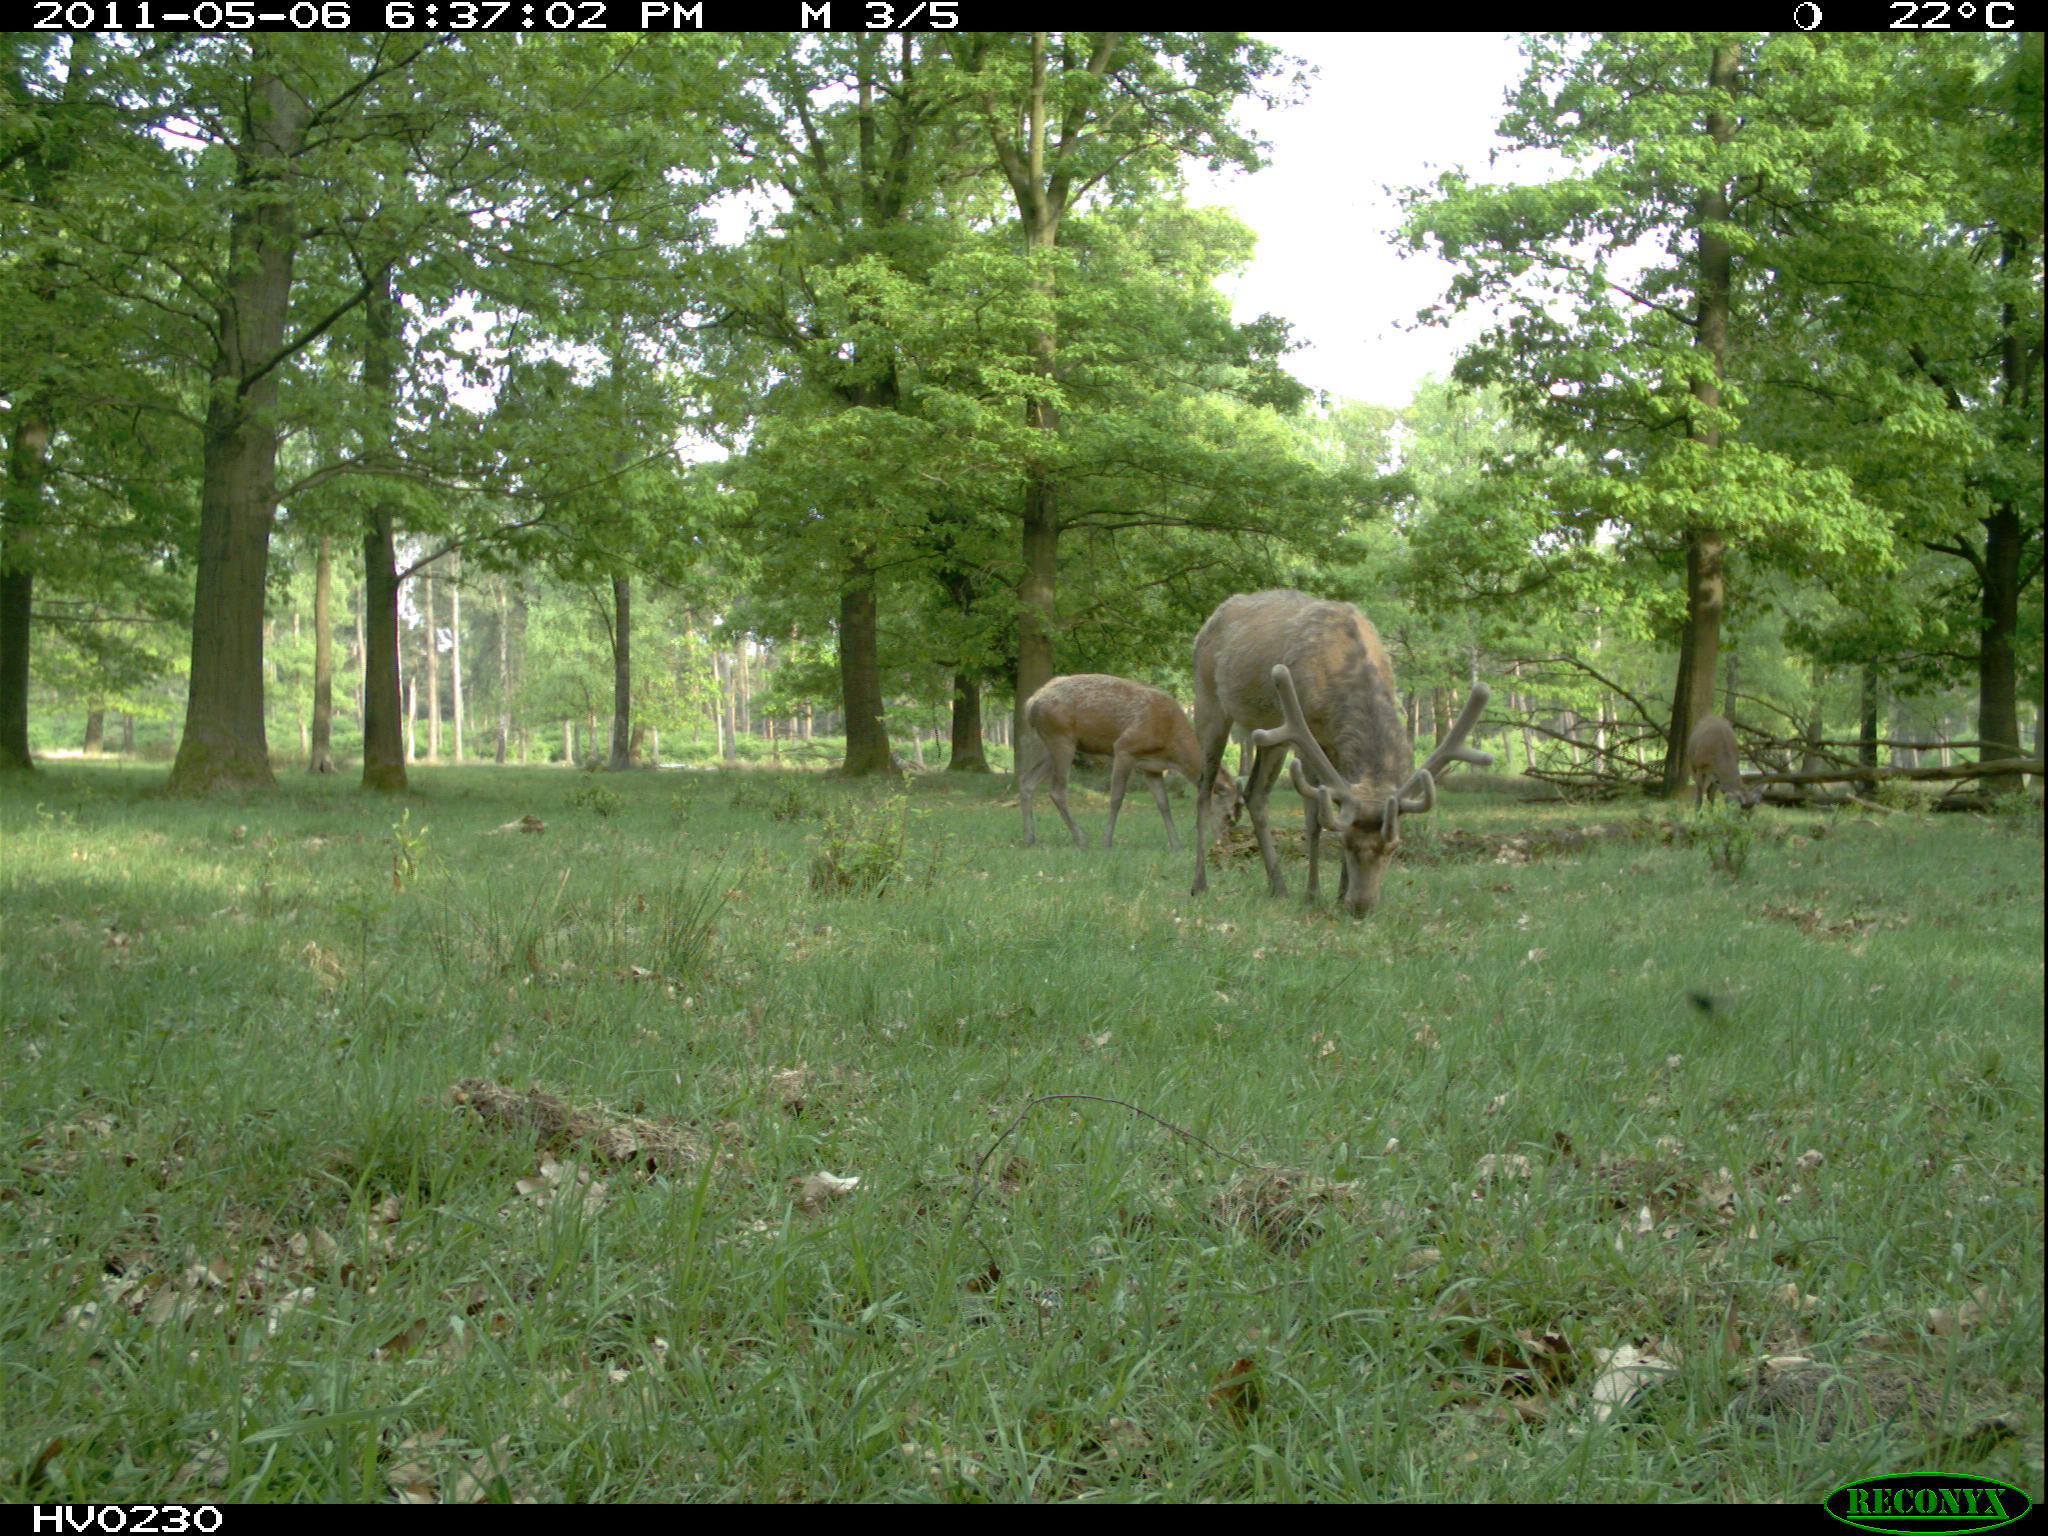

In [13]:
from IPython.display import Image
Image(filename='images/Set1/1.57-Red_Deer/SEQ76431/SEQ76431_IMG_0013.JPG', width=300,height=200) 

In [15]:
preprocessed_image = prepare_image('/1.57-Red_Deer/SEQ76431/SEQ76431_IMG_0013.JPG')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 1s 1s/step


In [16]:
results = imagenet_utils.decode_predictions(predictions)

35363/35363 [==============================] - 0s 1us/step


In [17]:
results

[[('n01877812', 'wallaby', 0.49053267),
  ('n02408429', 'water_buffalo', 0.089473404),
  ('n02415577', 'bighorn', 0.07911957),
  ('n02504013', 'Indian_elephant', 0.0450545),
  ('n02395406', 'hog', 0.03772707)]]